# Seq2seq to map SMILES to Fragment Peaks

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display, HTML
from model import load_data, get_model, train_model, save_model, decode_sequence
from collections import Counter
import pylab as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
import random

Using TensorFlow backend.


In [3]:
batch_size = 32  # Batch size for training.
epochs = 100  # Number of epochs to train for.
latent_dim = 64  # Latent dimensionality of the encoding space.
num_samples = 1000  # Number of samples to train on.

# Path to the data txt file on disk.
label = 'small'
data_path = '../data/representation_1/data_%s.txt' % label
model_out = 'results/s2s_%s.hdf5' % label
history_out = 'results/s2s_%ss_history.p' % label

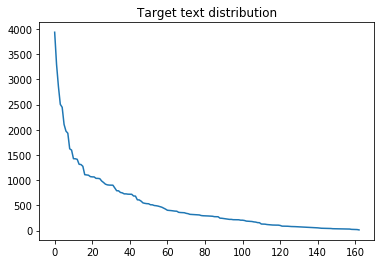

Number of samples: 1000
Number of unique input tokens: 28
['#', '(', ')', '+', '-', '/', '1', '2', '3', '4', '=', '@', 'B', 'C', 'F', 'H', 'N', 'O', 'P', 'S', '[', '\\', ']', 'c', 'l', 'n', 'r', 's']
Number of unique output tokens: 165
['\t', '\n', '100', '101', '103', '104', '105', '106', '108', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '182', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '202', '203', '204', '205', '206', '207', '208', '209', '210', '212', '213', '214', '215', '2

In [4]:
encoder_input_data, decoder_input_data, decoder_target_data, \
        num_encoder_tokens, num_decoder_tokens, max_decoder_seq_length, \
        target_token_index, reverse_target_char_index, input_texts = load_data( \
    data_path, num_samples)

In [5]:
model_choice = 0
model, encoder_model, decoder_model = get_model(encoder_input_data, decoder_input_data, decoder_target_data, 
                  num_encoder_tokens, num_decoder_tokens,
                  latent_dim, num_samples, model_choice)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, 28)     0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None, 165)    0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 64), (None,  23808       input_1[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, None, 64), ( 58880       input_2[0][0]                    
                                                                 lstm_1[0][1]                     
          

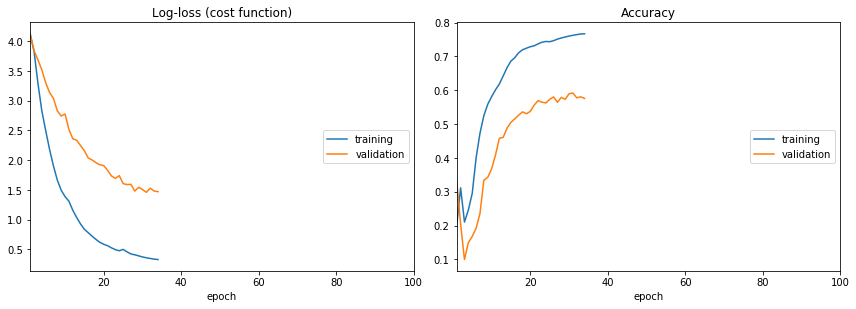

Epoch 00034: early stopping


In [6]:
model, history = train_model(model, batch_size, epochs, 
                             encoder_input_data, decoder_input_data, decoder_target_data)

-
Input sentence: CC(C)(C)c1nnc(SC)n(N)c1=O


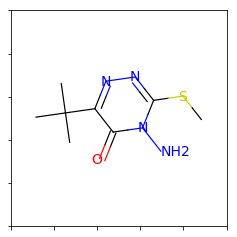

[('119', 103)]


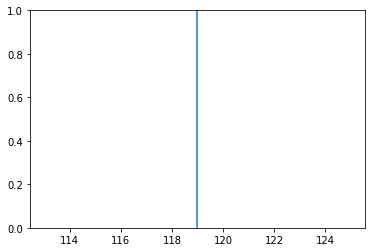

-
Input sentence: CC(C)(C)NC1=NC(=O)N=C(N)N1


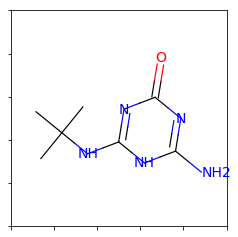

[('134', 103)]


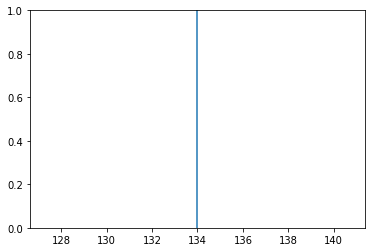

-
Input sentence: C(C)(C)c1ccc(N)cc1


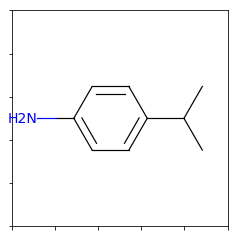

[('91', 103)]


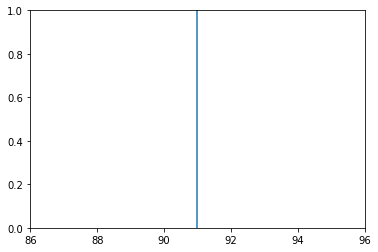

-
Input sentence: N(=c1[nH]c(=NC(C)C)[nH]c(O)n1)CC


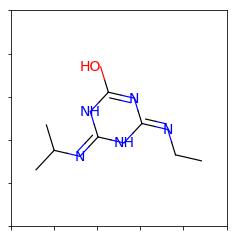

[('119', 103)]


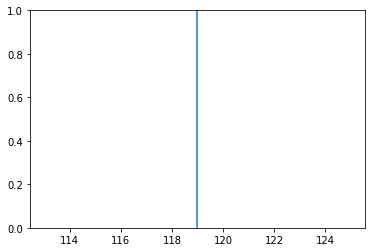

-
Input sentence: C1(C)N(c2c(CC)cccc2C)C(=O)COC1


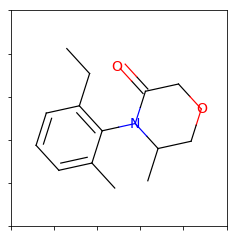

[('72', 103)]


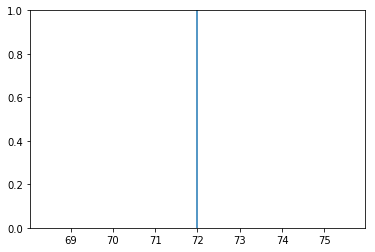

-
Input sentence: OC(CN)COc1ccc(CC(O)=N)cc1


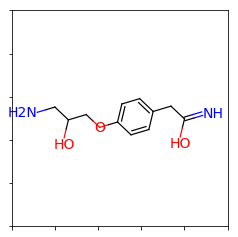

[('91', 103)]


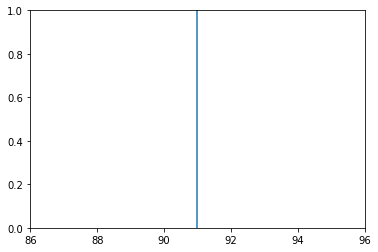

-
Input sentence: C(=O)(c1cccc(C)c1)N(CC)CC


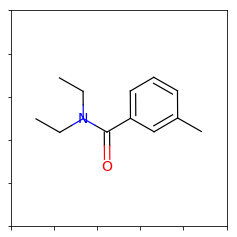

[('91', 103)]


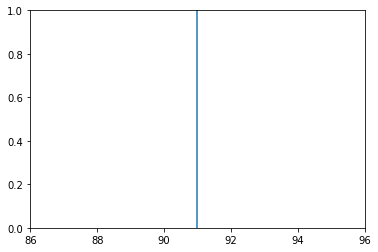

-
Input sentence: c1(=NCC)[nH]c(=NCC)nc(Cl)[nH]1


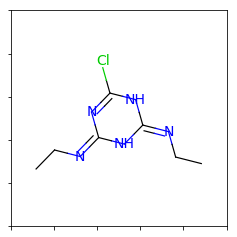

[('134', 103)]


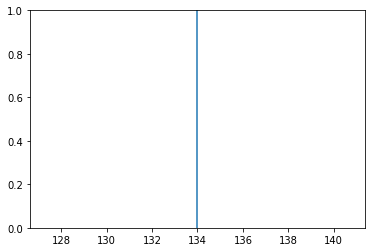

-
Input sentence: OC(=NC)CSP(OC)(=O)OC


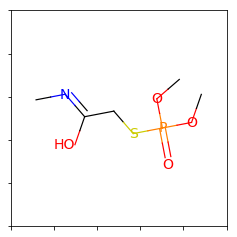

[('119', 103)]


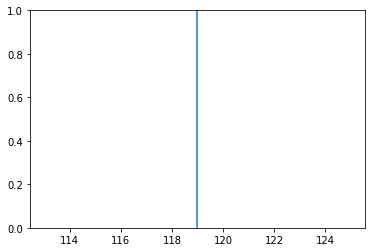

-
Input sentence: CC(C)(C)C=1C(N(C(=NN1)SC)N)=O


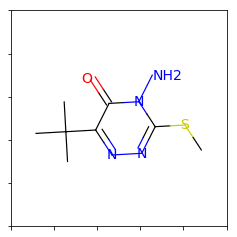

[('119', 103)]


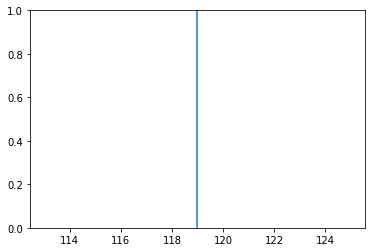

-
Input sentence: c1(=NC(C)C)[nH]c(OC)nc(=NC(C)C)[nH]1


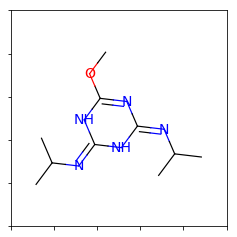

[('72', 103)]


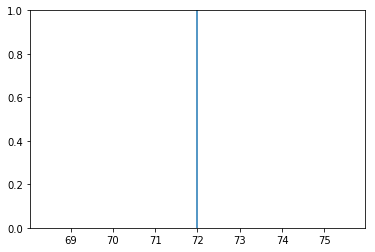

-
Input sentence: CSc1ccc(OP(OC)(=S)OC)cc1C


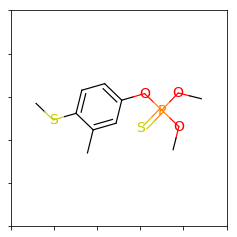

[('91', 103)]


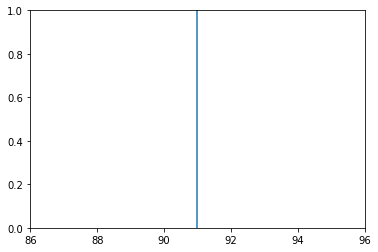

-
Input sentence: c1(C)[nH]c(=O)n(C(C)CC)c(=O)c1Br


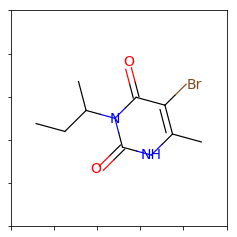

[('119', 103)]


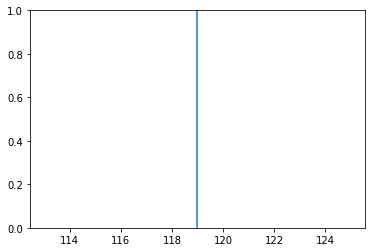

-
Input sentence: CCNC(=O)NC(/C(C#N)=N/OC)=O


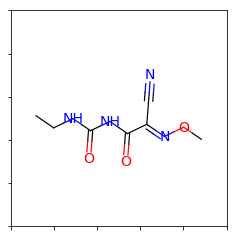

[('119', 103)]


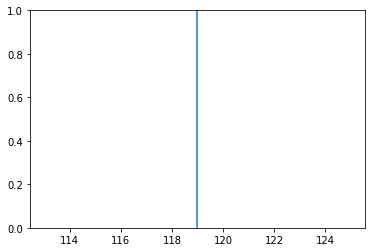

-
Input sentence: [nH]1c(=NCC)[nH]c(=N)nc1Cl


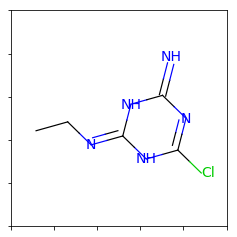

[('134', 103)]


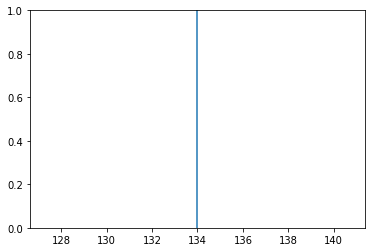

-
Input sentence: C(N=c1nc(O)[nH]c(=NCC)[nH]1)C


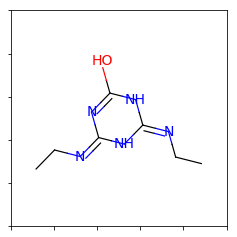

[('134', 103)]


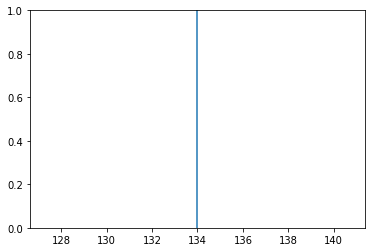

-
Input sentence: Cc1c(c(c(c(n1)C)Cl)O)Cl


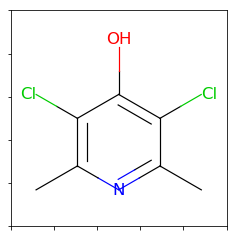

[('119', 103)]


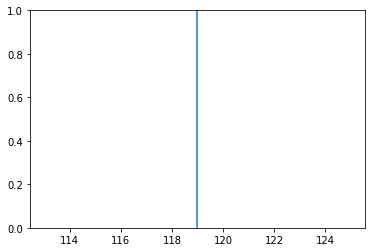

-
Input sentence: c1cc(Cl)ccc1NC(N(C)C)=O


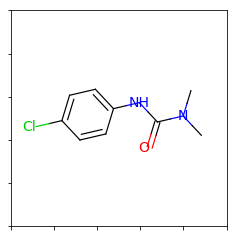

[('91', 103)]


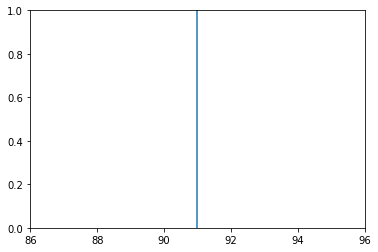

-
Input sentence: CSc1ccc(OP(OC)(=S)OC)cc1C


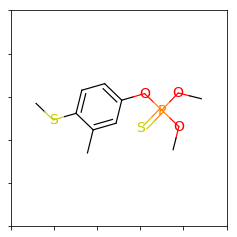

[('91', 103)]


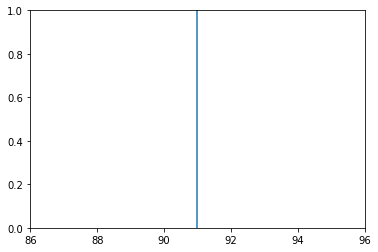

-
Input sentence: c1ccccc1CN(C(=O)C(C)(C)C)C(C)C


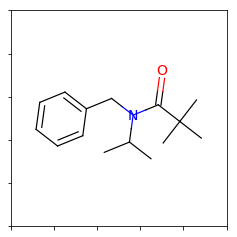

[('72', 103)]


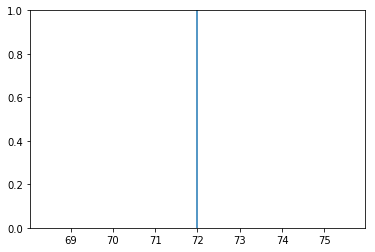

In [8]:
nums = [x for x in range(len(encoder_input_data))]
random.shuffle(nums)
for seq_index in nums[0:20]:
    # Take one sequence (part of the training set)
    # for trying out decoding.
    input_seq = encoder_input_data[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq, encoder_model, decoder_model,
                    num_decoder_tokens, target_token_index,
                    reverse_target_char_index, max_decoder_seq_length)

    smile = ''.join(list((input_texts[seq_index])))
    print('-')
    print('Input sentence:', smile)
    m = Chem.MolFromSmiles(smile) 
    size = (120, 120)  # Smaller figures than the default.
    fig = Draw.MolToMPL(m, size=size)
    plt.show()
    
    c = Counter(decoded_sentence)
    mz, intensities = zip(*c.most_common())
    intensities = np.array(intensities)
    print(c.most_common())
    for x, y in c.most_common():
        if x in ['UNK', '\n']:
            continue
        try:
            x = float(x)
            y = float(y/sum(intensities))
            # print('mz=%.2f'%x, 'intensity=%.2f'%y)
            plt.plot([x, x], [0, y])
        except ValueError:
            continue
            
    plt.ylim([0, 1])
    plt.show()

In [ ]:
# save_model(model, history, model_out, history_out)